# TODO

1. [ ] dependent_plot does not work
2. [ ] interaction value VS dependent value ??? 

# Module 

In [1]:
# make sure to reload new code without restart the kernel
%matplotlib inline
%load_ext autoreload
%autoreload 2
# enable code like `from src.config import`
import sys
sys.path.append('../')

# module 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# custom code
from src.config import code_base_dir
from scripts.train_config import train_config_detail
from scripts.train_config import raw_data_path, dir_mark, debug, model_dir
shap.initjs()


/Users/mac/opt/miniconda3/envs/ml_project/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


# Config

In [2]:
base_dir = '../'
dir_mark = 'iris_cla'

In [3]:
pipeline_class = train_config_detail[dir_mark]['pipeline_class']
feature_creator_class = train_config_detail[dir_mark]['feature_creator']
model_params_config = train_config_detail[dir_mark].get('model_params', {})
# grid_search_dict = train_config_detail[dir_mark].get('grid_search_dict', None)
# model_params = train_config_detail[dir_mark].get('model_params', {})
train_valid = train_config_detail[dir_mark].get('train_valid', False)
dense_features = train_config_detail[dir_mark].get('dense_features', None)
sparse_features = train_config_detail[dir_mark].get('sparse_features', None)
feature_clean_func = train_config_detail[dir_mark].get('feature_clean_func', None)
additional_train_params = train_config_detail[dir_mark].get('additional_train_params', {})

epochs = train_config_detail[dir_mark].get('epochs', None)
batch_size = train_config_detail[dir_mark].get('batch_size', None)
dense_to_sparse = train_config_detail[dir_mark].get('dense_to_sparse', None)
task = train_config_detail[dir_mark].get('task', None) # params for deepFM

target_col = train_config_detail[dir_mark]['target_col']
feature_used = dense_features + sparse_features
# assert feature_used is not None
if not train_config_detail[dir_mark].get('data_dir_mark', False):
    target_raw_data_dir = os.path.join(raw_data_path, dir_mark)
else:
    target_raw_data_dir = os.path.join(raw_data_path, train_config_detail[dir_mark].get('data_dir_mark', False))
# logging.info(f"Reading data from {target_raw_data_dir}")
model_path = os.path.join(model_dir, dir_mark)


In [4]:
model_path

'model_training/iris_cla'

In [5]:
target_raw_data_dir

'data/raw_data/iris_cla'

In [6]:
model_path = os.path.join(base_dir, model_path)
data_path = os.path.join(base_dir, target_raw_data_dir, 'train.csv')

In [7]:
model_path

'../model_training/iris_cla'

In [8]:
data_path

'../data/raw_data/iris_cla/train.csv'

# Data & Model 

In [9]:
df = pd.read_csv(data_path)[feature_used]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zero_0                   410 non-null    float64
 1   zero_1                   410 non-null    float64
 2   mean_radius              410 non-null    float64
 3   mean_texture             410 non-null    float64
 4   mean_perimeter           410 non-null    float64
 5   mean_area                410 non-null    float64
 6   mean_smoothness          410 non-null    float64
 7   mean_compactness         410 non-null    float64
 8   mean_concavity           410 non-null    float64
 9   mean_concave_points      410 non-null    float64
 10  mean_symmetry            410 non-null    float64
 11  mean_fractal_dimension   410 non-null    float64
 12  radius_error             410 non-null    float64
 13  texture_error            410 non-null    float64
 14  perimeter_error          4

In [11]:
model_path

'../model_training/iris_cla'

In [12]:
pipeline = pipeline_class(model_params={}, model_training=False, model_path=model_path)

In [13]:
pipeline.pipeline

PMMLPipeline(steps=[('data_transformer', ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 ['perimeter_error', 'zero_1',
                                  'mean_smoothness', 'compactness_error',
                                  'mean_compactness', 'worst_area',
                                  'worst_compactness', 'zero_0',
                                  'concavity_error', 'mean_fractal_dimension',
                                  'worst_smoothness', 'fractal_dimension_error',
                                  'mean_concave_points', 'radius_error',
                                  'mean_perimeter', 'mean_concavity',
                                  'mean_radius', 'smoothness_error',
                                  'worst_symmetry', 'mean_symmetry',
                                  'area_error', 'worst_radius', 'texture_error',
                                  'concave_points_error', 'mean_area',
                                 

In [14]:
model = pipeline.pipeline['model']
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# SHAP Value 

In [15]:
explainer = shap.Explainer(model=model)

In [19]:
explainer.expected_value

array([0.39148225])

In [20]:
pipeline.predict(df).mean()

0.5852539

## Individual case explain 

In [21]:
pipeline

In [23]:
# df.columns

In [46]:
columns_names = ['zero_0', 'zero_1', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

In [52]:
features = pipeline.pipeline['data_transformer'].transform(df.copy())
shap_values = explainer(features)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [48]:
# features

In [49]:
# new_df = pd.DataFrame(features, columns=columns_names)
# shap_values = explainer(new_df)
shap_values.shape

(410, 32)

In [50]:
explainer.expected_value

0.39148226

In [51]:
pipeline.predict(df).mean()

0.5852539

In [40]:
# model.predict_proba(features).mean()

In [41]:
# # explainer = shap.Explainer(self.pipeline['model'])
# # if isinstance(features, scipy.sparse._csr.csr_matrix):
# #     features = features.toarray()
# new_df = pd.DataFrame(features, columns=columns_names)
# shap_values = explainer(new_df)

In [42]:
explainer.expected_value

0.39148226

In [43]:
# shap_values[2]

In [54]:
shap.plots.force(shap_values[0], link='logit', feature_names=columns_names)

In [45]:
shap.plots.force(shap_values[0], link='logit')

In [47]:
shap.plots.force(shap_values[10], link='logit')

In [44]:
# pipeline.predict(df).mean()

In [45]:
pipeline.predict(df)

array([0.81172013, 0.81172013, 0.1891857 , 0.81172013, 0.81172013,
       0.81172013, 0.81172013, 0.8000048 , 0.81172013, 0.81172013,
       0.20208706, 0.81172013, 0.7638074 , 0.81172013, 0.1891857 ,
       0.81172013, 0.1891857 , 0.1891857 , 0.81172013, 0.27512777,
       0.1891857 , 0.7391596 , 0.1891857 , 0.1908381 , 0.1891857 ,
       0.79938054, 0.80362415, 0.81172013, 0.69350106, 0.19238746,
       0.19647883, 0.81172013, 0.81172013, 0.1891857 , 0.27512777,
       0.81172013, 0.28870976, 0.7367393 , 0.1979422 , 0.81172013,
       0.81172013, 0.81172013, 0.81172013, 0.81172013, 0.35486662,
       0.1891857 , 0.7693034 , 0.1891857 , 0.1891857 , 0.81172013,
       0.81172013, 0.79938054, 0.81172013, 0.81172013, 0.2528382 ,
       0.80337393, 0.27263263, 0.1891857 , 0.1891857 , 0.81172013,
       0.79938054, 0.81172013, 0.81172013, 0.81172013, 0.1891857 ,
       0.1891857 , 0.1891857 , 0.81172013, 0.81172013, 0.7351054 ,
       0.81172013, 0.81172013, 0.78155595, 0.20470393, 0.81172

In [17]:
# shap_values[4]?

## summary_plot 

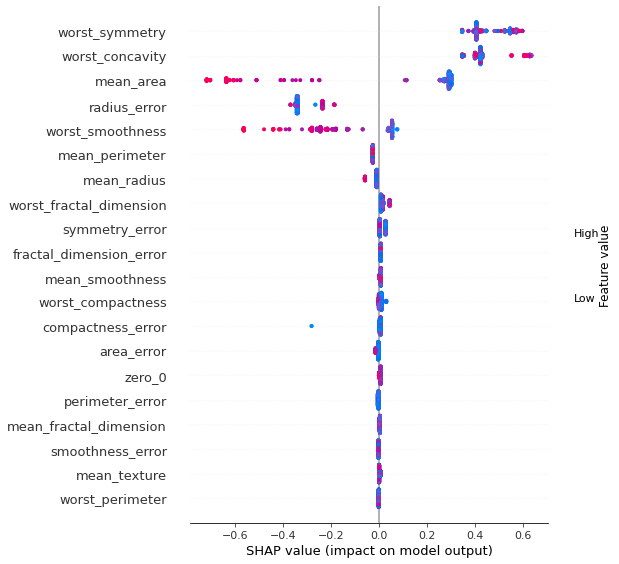

In [18]:
shap.summary_plot(shap_values, df)

In [19]:
# shap.plots.beeswarm(shap_values, #max_display=show_feature_num, 
#                     show=False
#                    )

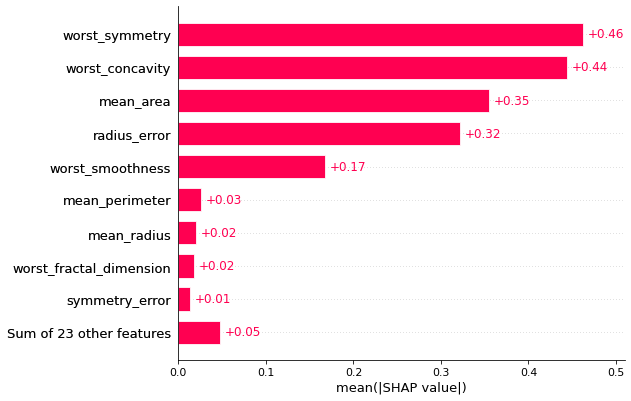

In [20]:
shap.plots.bar(shap_values #.abs.mean(0), #show=False, max_display=show_feature_num
              )

In [21]:
# shap.plots.bar(shap_values.abs.mean(0), #show=False, max_display=show_feature_num
#               )

## dependence_plot & scatter_plot

In [22]:
feature_used

['zero_0',
 'zero_1',
 'mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [23]:
# shap.dependence_plot('worst_symmetry', shap_values, df)


In [24]:
# for col in feature_used:
#     try:    
#         shap.dependence_plot(col, shap_values, df)
#     except:
#         print(col)

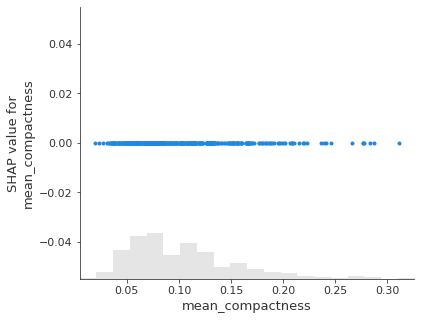

In [25]:
shap.plots.scatter(shap_values[:, 'mean_compactness'],
#                    color=shap_values[:, 'symmetry_error']
                  )

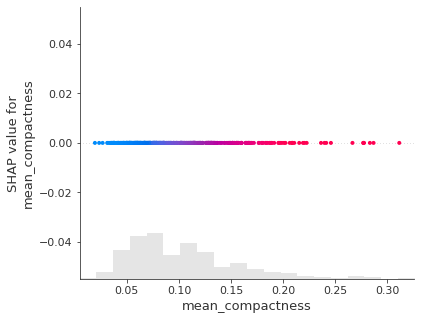

In [26]:
shap.plots.scatter(shap_values[:, 'mean_compactness'], color=shap_values[:, 'symmetry_error'])

## interaction_value 

In [78]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(df)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [79]:
shap_interaction_values.shape

(410, 30, 30)

In [80]:
feature_used

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

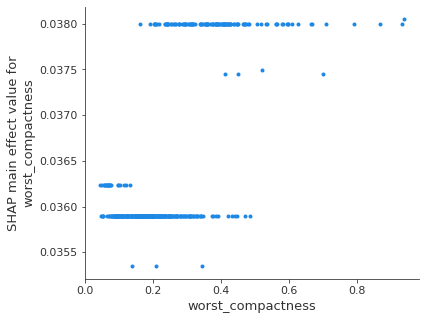

In [81]:
shap.dependence_plot(
    ('worst_compactness', 'worst_compactness'),
    shap_interaction_values, 
    df
)

In [27]:
shap.dependence_plot(
    ('worst_compactness', 'symmetry_error'),
    shap_interaction_values, 
    df
)

NameError: name 'shap_interaction_values' is not defined

# Individual_plot

Refer to [notebook in ML&DS repository](https://github.com/xiaoye-hua/MachineLearning_DataScience/blob/master/notebooks/20220324_shaply_value.ipynb)

# Ref 

1. [NHANES I Survival Model](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/NHANES%20I%20Survival%20Model.html)
2. [Analyse Interaction with SHAP](https://towardsdatascience.com/analysing-interactions-with-shap-8c4a2bc11c2a#:~:text=SHAP%20values%20are%20used%20to,their%20main%20and%20interaction%20effects.)